In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import sys, os
sys.path.append('../')
import itertools

markers = itertools.cycle(('o', '+', 'D', 'v', 's', '*', 'h', 'x'))

In [4]:
from rankutils.drawing import colors_from_cmap

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [6]:
def load_transition_diffs(dfile, nonzero=True):
    
    diffs_ = np.load(dfile)
    
    diffs = []
    pos = []
    
    aux = diffs_['diffs_00']
    diffs.append(aux['d'])
    pos.append(aux['i'])
    
    aux = diffs_['diffs_01']
    diffs.append(aux['d'])
    pos.append(aux['i'])
    
    aux = diffs_['diffs_10']
    diffs.append(aux['d'])
    pos.append(aux['i'])
    
    aux = diffs_['diffs_11']
    diffs.append(aux['d'])
    pos.append(aux['i'])
    
    del diffs_
    
    if nonzero:
        for i in range(len(diffs)):
            nzidx = np.flatnonzero(diffs[i])
            diffs[i] = diffs[i][nzidx]
            pos[i] = pos[i][nzidx]
            
    return diffs, pos

In [7]:
def boxplot_transition_diff(diffs, title):
    
    import matplotlib.lines as mlines
    
    fig, ax = plt.subplots(1)
    fig.set_size_inches((10, 10))
    ax.set_title(title)
    ax.set_ylabel('Sequential Score Difference (log)')
    ax.set_xlabel('Type of Label Transition')
    
    blim = np.min([np.min(d) for d in diffs])

    mc = colors_from_cmap('Greens', 0.7)[0]
    ax.boxplot(diffs,
               medianprops=dict(linewidth=2, color='red'),
               showmeans=True, meanprops=dict(marker='v', markersize=12, markerfacecolor=mc, markeredgecolor=mc))
    
    ax.set_xticklabels(["0 -> 0", "0 -> 1", "1 -> 0", "1 -> 1"])
    
    ax.set_yscale('log')
    ax.set_ylim(bottom=blim*0.1)
    
    mean_handler = mlines.Line2D([], [], color=mc, marker='v', linewidth=0.05, markersize=12, label='Mean')
    ax.legend(handles=[mean_handler])
    
    return

In [8]:
def plot_transition_freq(t_freq, title, ax=None, bar_kw=dict(), **kwargs):
    
    yscale = kwargs.get('yscale', 'linear')
    cmapname = kwargs.get('cmapname', 'tab20b')
    cmap = plt.get_cmap(cmapname)
    c = cmap(np.arange(t_freq.size))
    
    if not ax:
        ax = plt.gca
        
    ax.set_title(title)
    
    x = np.arange(0, 4)
    y = t_freq.reshape(-1)
    
    ax.bar(x, y, 0.8, 0.0, align='center', color=c, **bar_kw)
    
    # X axis setup
    ax.set_xlabel("Type of Transition")
    ax.set_xticks(x)
    _ = ax.set_xticklabels(["0 -> 0", "0 -> 1", "1 -> 0", "1 -> 1"])
    
    # Y axis setup
    ax.set_ylabel("Frequency")
    ax.set_yscale(yscale)
    
    ax.legend()
    
    return

***
# Sequential Score Difference Stats

(2671120, 2)


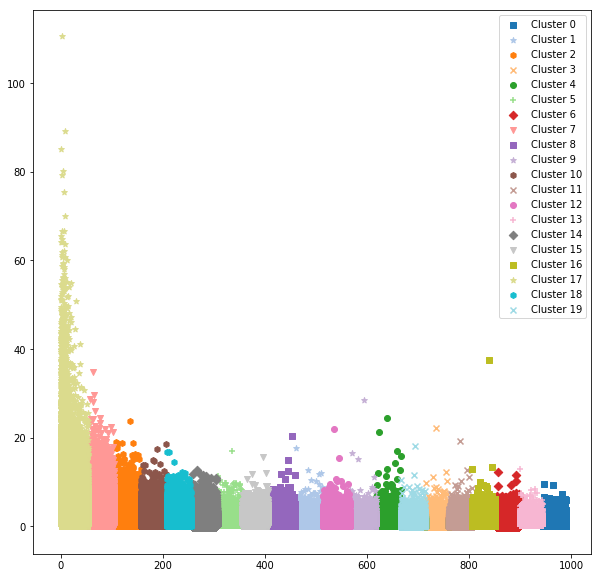

In [13]:
diffs, pos = load_transition_diffs('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./places365.e002.resnet152.t_diffs.10:1000.npz')

data = np.hstack([pos[0].reshape(-1, 1), diffs[0].reshape(-1, 1)])
print(data.shape)

kmns = KMeans(n_clusters=20)
kmns.fit(data)

centers = kmns.cluster_centers_
labels = kmns.labels_

fig, ax0 = plt.subplots(1)
#ax0, ax1, ax2, ax3 = a
fig.set_size_inches((10, 10))
colors = itertools.cycle(plt.get_cmap('tab20').colors)

for cidx in range(20):
    
    pidx = np.flatnonzero(labels == cidx)
    cpts = data[pidx]
    ax0.scatter(cpts[:, 0], cpts[:, 1], marker=next(markers), color=next(colors), 
                label="Cluster {0:d}".format(cidx))
    

#for cpt in centers:
    #ax0.scatter(cpt[0], cpt[1], marker=next(markers), color=next(colors), 
                #label="({0:0.2f}, {1:0.2f})".format(cpt[0], cpt[1]))
    
ax0.legend()

<BarContainer object of 1494 artists>

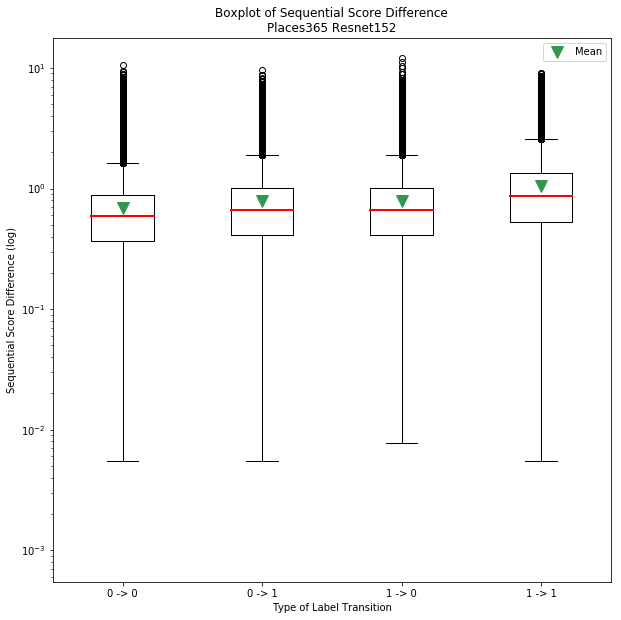

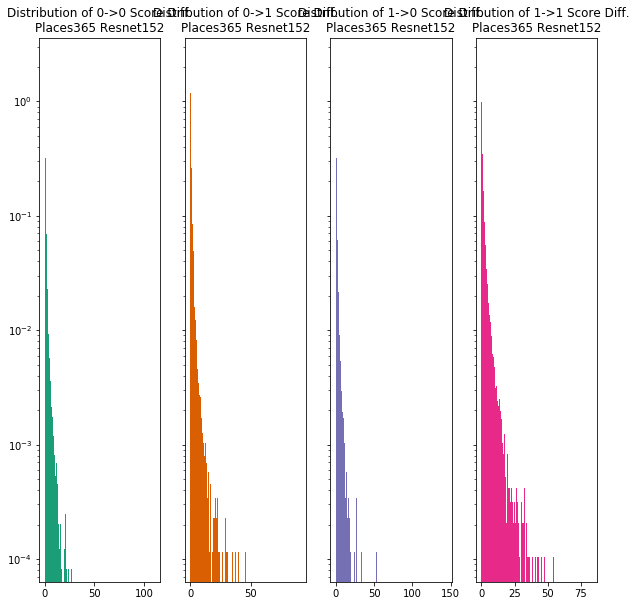

In [10]:
diffs, pos = load_transition_diffs('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./places365.e002.resnet152.t_diffs.10:1000.npz')

boxplot_transition_diff([np.sqrt(d) for d in diffs], 'Boxplot of Sequential Score Difference\nPlaces365 Resnet152')

fig, a = plt.subplots(1, 4, sharey=True)
ax0, ax1, ax2, ax3 = a
fig.set_size_inches((10, 10))
c = plt.get_cmap('Dark2')

ax0.set_title('Distribution of 0->0 Score Diff.\nPlaces365 Resnet152')
y, x = np.histogram(diffs[0], bins='auto', density=True)
ax0.bar(x[:-1], y, x[1]-x[0], 0.0, align='edge', color=c(0))
ax0.set_yscale('log')

ax1.set_title('Distribution of 0->1 Score Diff.\nPlaces365 Resnet152')
y, x = np.histogram(diffs[1], bins='auto', density=True)
ax1.bar(x[:-1], y, x[1]-x[0], 0.0, align='edge', color=c(1))
ax1.set_yscale('log')

ax2.set_title('Distribution of 1->0 Score Diff.\nPlaces365 Resnet152')
y, x = np.histogram(diffs[2], bins='auto', density=True)
ax2.bar(x[:-1], y, x[1]-x[0], 0.0, align='edge', color=c(2))
ax2.set_yscale('log')

ax3.set_title('Distribution of 1->1 Score Diff.\nPlaces365 Resnet152')
y, x = np.histogram(diffs[3], bins='auto', density=True)
ax3.bar(x[:-1], y, x[1]-x[0], 0.0, align='edge', color=c(3))